# PHYS-E0412 Computational Physics :: Homework 8
Ari Viitala 432568

In [388]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy

In [402]:
N = 51
x = np.linspace(0,1, N)
T = np.zeros((N,N))
V = np.zeros((N,N))
S = np.zeros((N,N))
H = np.zeros((N,N))

In [403]:
def pot(s):
    return -150*np.exp(-40*(s -0.25)**2)-50*np.exp(-10*(s-0.75)**2)

def bas(s, i, x):
    bas1 = 0
    if s > x[i - 1] and s <= x[i]:
        bas1 = (s - x[i-1]) / (x[i] - x[i-1])
    elif s > x[i] and s < x[i+1]:
        bas1 = (x[i+1] - s) / (x[i + 1] - x[i])
    
    return bas1

In [404]:
for i in range(1,N-1):
    hi = x[i] - x[i-1] 
    hj = x[i+1] - x[i]
    
    S[i,i-1] = 1/6 * hi
    S[i,i] = 1/3 * (hi + hj)
    S[i,i+1] = 1/6 * hj
    
    T[i, i] = 1 / hi + 1/hj
    T[i, i - 1] =  -1 / hi
    T[i, i + 1] = -1 / hj
    

    V[i, i -1] = quad((lambda a: bas(a,i-1, x) * pot(a) * bas(a, i-1, x)), 0, 1, points = x)[0] 
    V[i, i] = quad((lambda a: bas(a,i, x) * pot(a) * bas(a, i, x)), 0, 1, points = x)[0] 
    V[i, i +1] = quad(lambda a: bas(a,i+1, x) * pot(a) * bas(a, i+1, x), 0, 1, points = x)[0]

T *= 0.5

/home/ari/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


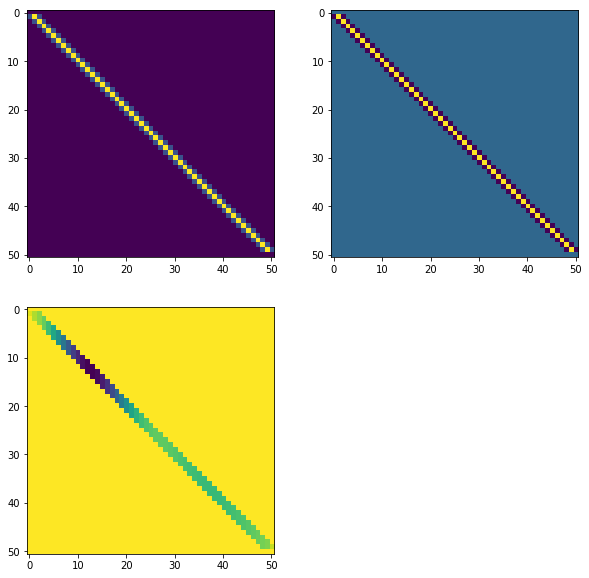

In [405]:
plt.figure(1, (10,10))
plt.subplot(2,2,1)
plt.imshow(S)
plt.subplot(2,2,2)
plt.imshow(T)
plt.subplot(2,2,3)
plt.imshow(V)


In [406]:
H = T + V

In [407]:
a, b = scipy.linalg.eigh(H[1:N-1,1:N-1], S[1:N-1,1:N-1])

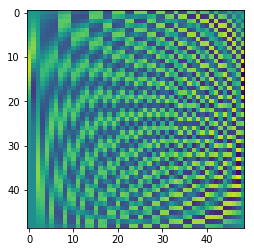

In [408]:
plt.imshow(b)

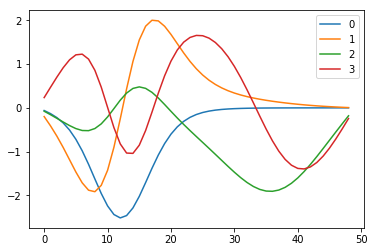

In [409]:
#plt.plot(pot(x))
for i in range(0, 4):
    plt.plot(-b[:, i], label = str(i))
plt.legend()

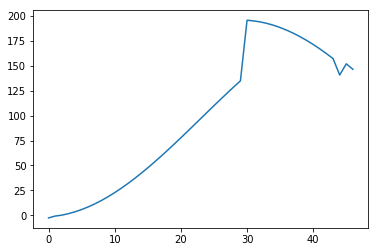

In [193]:
plt.plot(a[0])

In [343]:
MV = np.loadtxt("V-51.txt")
MT = np.loadtxt("T-51.txt")
MS = np.loadtxt("S-51.txt")
MH = np.loadtxt("H-51.txt")

In [344]:
c,d = scipy.linalg.eigh(MH[1:N-1,1:N-1], MS[1:N-1,1:N-1])

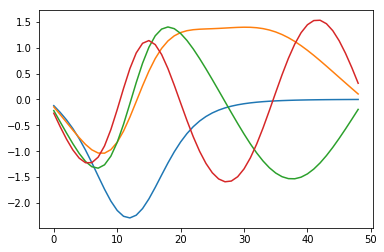

In [345]:
for i in range(0, 4):
    plt.plot(-d[:, i])

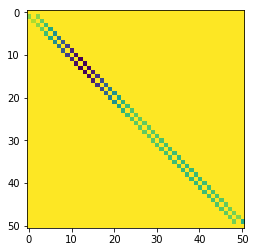

In [348]:
plt.imshow(H - MH)

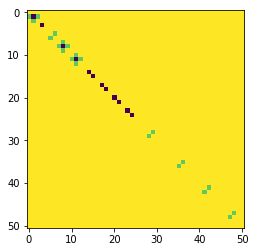

In [349]:
plt.imshow(S - MS)

In [350]:
S - MS

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.33680869e-19, -1.73472348e-18, -4.33680869e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -4.33680869e-19,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

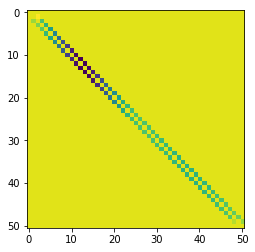

In [358]:
plt.imshow(V - MV)

In [410]:
V - MV

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.21335869e-02,  0.00000000e+00, -2.75185513e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.72273988e-01, -7.44548867e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.21964677e-15, -2.90086753e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.26189973e-01, -2.21239693e-12, -1.82896710e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])